# Лекция 02. Алгоритмы, основанные на стратегиях. Алгоритм REINFORCE

## Введение

![](pictures/ron-williams.jpg)

Рональд Дж. Вильямс

- Williams R. J. Simple statistical gradient-following algorithms for connectionist reinforcement learning // Machine Learning. 1992. P. 229–256. DOI: [10.1007/BF00992696](https://doi.org/10.1007/BF00992696).

## Целевая функция

Обозначим траекторию
$$\tau=s_0,a_0,r_0\ldots s_T,a_T,r_T.$$
Отдача по траектории $R_t(\tau)$ определяется как дисконтированная сумма вознаграждений, начиная с шага $t$ и до конца траектории:
$$R_t(\tau)=\sum_{t'=t}^{T}\gamma^{t'-t}r'_t.$$

Когда $t=0$, отдача расчитывается для полной траектории: $R_0(\tau)=R(\tau)$.

Целевая функция — ожидаемая отдача по всем полным траекториям, порожденным агентом.
$$J(\pi_{\theta})=\mathbb{E}_{\tau \sim \pi_{\theta}}\left[R(\tau)\right]=\mathbb{E}_{\tau \sim \pi_{\theta}}\left[\sum_{t=0}^{T}\gamma^t r_t\right].$$

## Градиент стратегии

Имеем стратегию $\pi_{\theta}$ и целевую функцию $J(\pi_{\theta})$.

Алгоритм градиента стратегии решает следующую задачу:
$$
\max_{\theta}J\left(\pi_{\theta}\right)=\mathbb{E}_{\tau\sim\pi_{\theta}}\left[R(\tau)\right].
$$
Чтобы улучшить значение целевой функции (гиперповерхность), вычислим градиент и применим его для обновления параметров
$$
\theta\leftarrow \theta + \alpha\nabla_{\theta} J\left(\pi_{\theta}\right),
$$
где $\alpha$ — скорость обучения (скаляр), контролирует степень обновления параметров; $\nabla_{\theta}J(\pi_{\theta})$ — градиент стратегии, который определяется как
$$
\nabla_{\theta} J(\pi_{\theta})=\mathbb{E}_{\tau\sim\pi_{\theta}}\left[\sum_{t=0}^{T}R_{t}(\tau)\nabla_{\theta} \log\pi_{\theta}\left(a_t | s_t\right)\right],
$$
в котором $\pi_{\theta}\left(a_t | s_t\right)$ — вероятность действия, предпринятого агентом на шаге $t$. Действие выбрано по стратегии, $a_t\sim\pi_{\theta}{\left(s_t\right)}$.

### Оптимизаторы

Параметр $\theta$ может быть получен с помощью любого подходящего оптимизатора, который принимает на входе $\nabla_{\theta} J(\pi_{\theta})$.

- Градиентный спуск (Gradient Descent)
- Momentum
- AdaGrad, Adadelta
- RMSprop (Root Mean Square Propagation)
- Adam (Adaptive Moment Estimation)
- Nadam (Nesterov-accelerated Adaptive Moment Estimation)
- FTRL (Follow the Regularized Leader)
- и т. д.

## Вывод формулы для градиента по стратегиям

Рассмотрим
$$
\nabla_{\theta}J(\pi_{\theta})=\nabla_{\theta}\mathbb{E}_{\tau\sim\pi_{\theta}}\left[R(\tau)\right].
$$
Поскольку $R(\tau)=\sum_{t=0}^T\gamma^t r_t$ невозможно продифференцировать по $\theta$, решение рассматриваемого уравнения представляется проблематичным.

Нужно привести рассматриваемое уравнение к форме, которая будет позволять взять градиент по $\theta$.

Если заданы функция $f(x)$, параметризованное распределение вероятностей $p(x | \theta)$ и его математическое ожидание $\mathbb{E}_{x\sim p(x|\theta)}\left[f(x)\right]$, то градиент математического ожидания:

$$
\nabla_{\theta}\mathbb{E}_{x\sim p(x | \theta)}\left[f(x)\right]=\nabla_{\theta}\int f(x) p(x|\theta) dx=\int\nabla_{\theta}\left(f(x) p(x|\theta)\right) dx=
$$

$$=\int \left(f(x)\nabla_{\theta} p(x|\theta)+p(x|\theta)\nabla_{\theta}f(x)\right)dx=$$

$$
=\int f(x)\nabla_{\theta}p(x|\theta)dx\overset{\text{т.к.} \nabla_{\theta}\log p(x|\theta)=\frac{\nabla_{\theta} p(x|\theta)}{p(x|\theta)}}{=}\int f(x) p(x|\theta)\frac{\nabla_{\theta} p(x|\theta)}{p(x|\theta)}dx=
$$

$$
=\int f(x)p(x|\theta)\nabla_{\theta}\log p(x|\theta)dx= E_x\left[f(x)\nabla_{\theta}\log p(x|\theta)\right]dx.
$$

Теперь очевидно, что данное тождество можно применить к целевой функции. С помощью подстановки $x=\tau$, $f(x)=R(\tau)$, $p(x|\tau)=p(\tau|\theta)$ перепишем исходное уравнение (градиент целевой функции):

$$
\nabla_{\theta}J(\pi_{\theta})=\mathbb{E}_{\tau\sim\pi_{\theta}}\left[R\left(\tau\right)\nabla_{\theta}\log p(\tau | \theta)\right].
$$

Тут отметим, что нужно связать член $p(\tau|\theta)$ со стратегией $\pi_{\theta}$, которой мы можем управлять, его нужно развернуть. Тогда:

$$
p(\tau|\theta)=\prod_{t\geqslant 0} p(s_{t+1}|s_t,a_t)\pi_{\theta}(a_t|s_t).
$$

Прологарифмируем правую и левую части этого уравнения:

$$
\log p(\tau|\theta)=\log\prod_{t\geqslant 0} p(s_{t+1}|s_t,a_t)\pi_{\theta}(a_t|s_t),
$$
$$
\log p(\tau|\theta)=\sum_{t\geqslant 0}\left(\log p (s_{t+1} | s_t, a_t)+\log\pi_{\theta}(a_t,s_t)\right),
$$
$$
\nabla_{\theta}\log p(\tau|\theta)=\nabla_{\theta}\sum_{t\geqslant 0}\left(\log p (s_{t+1} | s_t, a_t)+\log\pi_{\theta}(a_t,s_t)\right),
$$
$$
\nabla_{\theta}\log p(\tau|\theta)=\nabla_{\theta}\sum_{t\geqslant 0}\log\pi_{\theta}(a_t|s_t).
$$

В итоге, запишем $\nabla_{\theta}J(\pi_{\theta})$ (см. самое первое уравнение в разделе) в дифференцируемой форме. Получаем:
$$
\nabla_{\theta}J(\pi_{\theta})=\mathbb{E}_{\tau\sim\pi_{\theta}}\left[\sum_{t=0}^T R_t(\tau)\nabla_{\theta}\log\pi_{\theta}(a_t|s_t)\right].
$$

## Выборка методом Монте-Карло

Алгоритм REINFORCE вычисляет градиент стратегии с помощью выборки методом Монте-Карло. Под выборкой методом Монте-Карло подразумевается любой метод, в котором данные, используемые для аппроксимации функции, генерируются путем случайной выборки.

### Пример с вычислением приближенного числа $\pi$

Рассмотрим метод Монте-Карло на примере вычисления числа $\pi$ (константы). Возьмем окружность радиусом $r=1$ ($S_{\circ}=\pi r^2$) с центром в начале координат и вписываем в квадрат ($S_{\square}=(2r)^2$). Следовательно
$$
\frac{S_{\circ}}{S_{\square}}=\frac{\pi r^2}{(2r)^2}=\frac{\pi}{4}.
$$

Расстояние от точки $(x,y)$, лежащей внутри окружности, до начала координат меньше 1:

$$
\sqrt{(x-0)^2+(y-0)^2}\leqslant 1.
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

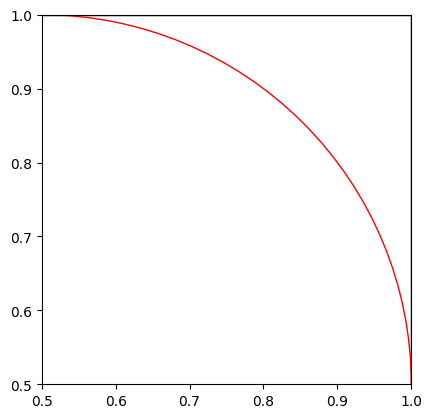

In [2]:
fig, ax = plt.subplots()

# Квадрат
square_size = 1
square = plt.Rectangle((0, 0), square_size, square_size, fill=None, edgecolor='black')
ax.add_patch(square)

# Круг
circle_radius = square_size / 2
circle = plt.Circle((circle_radius, circle_radius), circle_radius, fill=None, edgecolor='red')
ax.add_patch(circle)

ax.set_xlim(0.5, square_size)
ax.set_ylim(0.5, square_size)
ax.set_aspect('equal', 'box')
plt.show()

In [3]:
n_points = 100000 # Количество случайных точек

In [4]:
x = np.random.uniform(0, 1, n_points)
y = np.random.uniform(0, 1, n_points)

In [5]:
# Проверка, попадает ли точка внутрь четверти круга
inside = x**2 + y**2 <= 1

In [6]:
pi_estimate = 4 * np.sum(inside) / n_points

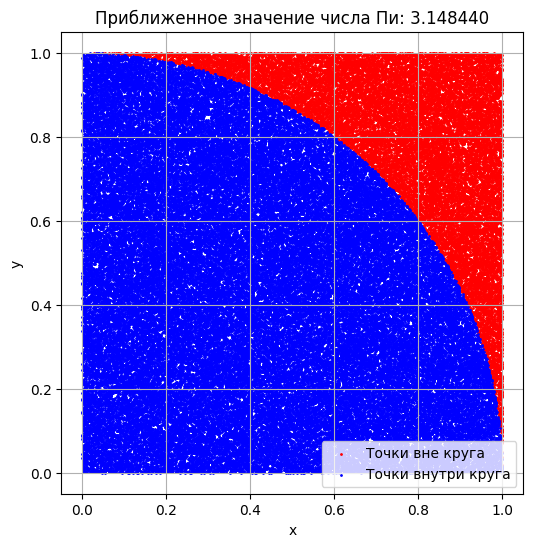

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect("equal")
ax.scatter(x[~inside], y[~inside], color="red", s=1, label="Точки вне круга")
ax.scatter(x[inside], y[inside], color="blue", s=1, label="Точки внутри круга")
ax.legend()
ax.set_title(f"Приближенное значение числа Пи: {pi_estimate:.6f}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [8]:
error = abs(pi_estimate - np.pi)
p = int(np.floor(np.log10(error)))
x = error / 10**p
print(f"{x} * 10^{p}")

6.847346410206789 * 10^-3


### В RL

Математическое ожидание $\mathbb{R}_{\tau\sim\pi_{\theta}}$ подразумевает, что чем больше траектория $\tau$ сгенерировано с помощью стратегии $\pi_{theta}$ и усреднено, тем оно ближе к реальному градиенту стратегии $\nabla_{\theta}J(\pi_{\theta})$. Для конкретной стратегии вместо большего количества траекторий можно взять лишь одну, как показано в уравнении:
$$
\nabla_{\theta}J(\pi_{\theta})\approx\sum_{t=0}^{T}R(\tau)\nabla_{\theta}\log\pi_{\theta}(a_t|s_t).
$$
Так реализован градиент стратегии — как оценка методом Монте-Карло с выборкой по сгенерированным траекториям.

## REINFORCE

### Алгоритм

1. Инициализируем скорость обучения $\alpha$
2. Инициализируем веса сети стратегий $\pi_{\theta}$
3. **for** $episode = 0$, $\ldots$ , $MAX\_EPISODE$ **do**
4. $\quad$ Выбрать траекторию $\tau = s_{\tau}$, $a_{\theta}$, $r_{\theta}$, $\ldots$, $s_T, a_T, r_T$
5. $\quad$ Установить $\nabla_{\theta}(\pi_{\theta})=0$
6. $\quad$ **for** $t=0$, $\ldots$, $T$ **do**
7. $\quad\quad$ $R_t(\tau)=\sum_{t'=t}^{T}\gamma^{t'-t}r'_t$
8. $\quad\quad$ $\nabla_{\theta} J(\pi_{\theta})\leftarrow\nabla_{\theta}(\pi_{\theta})+R_t(\tau)\nabla_{\theta}\log\pi_{\theta}(a_t|s_t)$
9. $\quad$ **end for**
10. $\quad$ $\theta \leftarrow \theta + \alpha\nabla_{\theta} J(\pi_{\theta})$
11. **end for**

### Улучшение метода

Проблема — высокая дисперсия.

Один из способов снижения дисперсии оценки — преобразовать отдачи, выделив соответствующее базовое значение, не зависящее от действий:
$$
\nabla_{\theta} J(\pi_{\theta})\approx\sum_{t=0}^{T}\left(R_t(\tau)-b(s_t)\right)\nabla_{\theta}\log\pi_{\theta}(a_t | s_t).
$$
Один из примеров базового значения — функция полезности $V^{\pi}$.

Альтернатива — использовать средних отдач на траектории. Пусть $b=\frac{1}{T}\sum_{t=0}^T R_t(\tau)$.

### Программная реализация метода

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from torch.distributions import Categorical
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

gamma = 0.99

class Pi(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(Pi, self).__init__()
        layers = [
            nn.Linear(in_dim, 64),
            nn.ReLU(),
            nn.Linear(64, out_dim),
        ]
        self.model = nn.Sequential(*layers)
        self.onpolicy_reset()
        self.train() # Установить режим обучения

    def onpolicy_reset(self):
        self.log_probs = []
        self.rewards = []

    def forward(self, x):
        pdparam = self.model(x)
        return pdparam

    def act(self, state):
        x = torch.from_numpy(state.astype(np.float32))       # Преобразование в тензор
        pdparam = self.forward(x)                            # Прямой ход
        pd = Categorical(logits=pdparam)
        action = pd.sample()                                 # pi(a|s) выбор действия по распределению pd
        log_prob = pd.log_prob(action)                       # логарифм вероятности pi(a|s)
        self.log_probs.append(log_prob)                      # сохраняем для обучения
        return action.item()

    def train_step(self, optimizer):
        # Внутренний цикл градиентного восхождения в алгоритме REINFORCE
        T = len(pi.rewards)
        rets = np.empty(T, dtype=np.float32)                   # отдачи
        future_ret = 0.0
        # эффективное вычисление отдачи
        for t in reversed(range(T)):
            future_ret = pi.rewards[t] + gamma * future_ret
            rets[t] = future_ret
        rets = torch.tensor(rets)
        log_probs = torch.stack(pi.log_probs)
        loss = -log_probs * rets                               # член градиента; знак минус для максимизации
        loss = torch.sum(loss)
        optimizer.zero_grad()
        loss.backward()                                        # обратное распространение, выисление градиентов
        optimizer.step()                                       # градиентное восхождение, обновление весов
        return loss

In [11]:
env = gym.make('CartPole-v0')
in_dim = env.observation_space.shape[0]
out_dim = env.action_space.n
pi = Pi(in_dim, out_dim)
optimizer = optim.Adam(pi.parameters(), lr=0.01)
for epi in range(300):
    state, _ = env.reset()
    for t in range(200):
        action = pi.act(state)
        
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        pi.rewards.append(reward)
        env.render()
        if done:
            break
    loss = pi.train_step(optimizer)
    total_reward = sum(pi.rewards)
    solved = total_reward > 195.0
    pi.onpolicy_reset()
    print(f"Episode {epi}, loss: {loss}, total_reward: {total_reward}, solved: {solved}")

Episode 0, loss: 291.219970703125, total_reward: 30.0, solved: False
Episode 1, loss: 222.65240478515625, total_reward: 26.0, solved: False
Episode 2, loss: 221.04762268066406, total_reward: 26.0, solved: False
Episode 3, loss: 170.937744140625, total_reward: 23.0, solved: False
Episode 4, loss: 763.5009765625, total_reward: 51.0, solved: False
Episode 5, loss: 191.39646911621094, total_reward: 24.0, solved: False
Episode 6, loss: 243.24871826171875, total_reward: 28.0, solved: False
Episode 7, loss: 546.0445556640625, total_reward: 43.0, solved: False
Episode 8, loss: 56.234275817871094, total_reward: 12.0, solved: False
Episode 9, loss: 216.9434051513672, total_reward: 26.0, solved: False
Episode 10, loss: 94.06437683105469, total_reward: 17.0, solved: False
Episode 11, loss: 47.78948974609375, total_reward: 12.0, solved: False
Episode 12, loss: 80.17550659179688, total_reward: 13.0, solved: False
Episode 13, loss: 278.93536376953125, total_reward: 30.0, solved: False
Episode 14, los